## 📢 Marketing Campaign Response Prediction

Given *subjects in a marketing campaign*, let's try to predict whether a given subject will **respond** to the campaign.

We will use Tensorflow neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('archive/marketing_campaign.csv', delimiter=';')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Preprocessing

In [15]:
df = data.copy()

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [17]:
# Drop ID column
df = df.drop('ID', axis=1)

In [18]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [19]:
# Fill missing Income values with column mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [20]:
df.isna().sum().sum()

np.int64(0)

In [21]:
# Date Encoding
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,6,10
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24


In [22]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [23]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [25]:
# One-hot encoding
for column in ['Education', 'Marital_Status']:
    df = onehot_encode(df, column)

In [26]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,6,10,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,0,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [29]:
# Split df into X and y
y = df['Response'].copy()
X = df.drop('Response', axis=1)

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [31]:
len(X_train), len(X_test)

(1568, 672)

In [32]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [33]:
X_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1747,-1.913598,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,-0.058848,-0.242557,1.899016,-0.670921,0.670017,0.444401,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,1.397448,-0.304439,-0.157596,-1.003834,2.242938,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
115,-0.573780,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,-0.676671,-0.627602,-0.309914,-0.151413,-0.725185,-0.562565,-0.848420,0.297986,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,-0.632170,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1739,0.179867,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,-0.676671,-0.531341,-0.774952,-0.670921,-1.073985,-0.898221,-0.848420,1.110581,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.519414,-0.304439,-0.157596,-1.003834,-0.445844,1.865476,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
336,-0.071349,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,0.631660,1.682671,-0.251784,-0.670921,2.414019,0.444401,0.065472,-0.514609,-0.267900,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,1.616052,-1.083196,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
2031,-1.159951,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,0.159207,-0.483210,1.937769,0.368095,1.018818,-0.226910,1.588626,-0.108311,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.327280,1.171935,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.155087,0.841743,-0.818551,0.909806,0.569301,0.764756,1.477772,0.014023,-0.222389,2.308370,1.375848,-0.151413,-0.027584,1.451367,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-1.517709,0.749737,0.608152,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
905,0.682299,1.506086,-0.818551,-0.928565,1.566075,0.565246,1.653148,0.975520,2.848553,-0.386949,3.836673,-0.670921,-0.376384,0.444401,1.283995,-2.139798,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.694119,-0.744927,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1096,-0.908735,1.263423,-0.818551,0.909806,0.191214,0.803467,-0.451367,0.210693,-0.295074,-0.266622,-0.193655,-0.670921,-0.027584,0.108746,-0.239158,-1.733501,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.116577,-1.534223,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
235,0.514822,-1.388929,1.038884,-0.928565,0.019356,-0.890882,-0.426313,-0.645914,-0.567643,-0.459145,-0.426173,-0.151413,-0.725185,-0.898221,-0.543789,0.297986,-0.26

In [36]:
X_train.var()

Year_Birth                 1.000638
Income                     1.000638
Kidhome                    1.000638
Teenhome                   1.000638
Recency                    1.000638
MntWines                   1.000638
MntFruits                  1.000638
MntMeatProducts            1.000638
MntFishProducts            1.000638
MntSweetProducts           1.000638
MntGoldProds               1.000638
NumDealsPurchases          1.000638
NumWebPurchases            1.000638
NumCatalogPurchases        1.000638
NumStorePurchases          1.000638
NumWebVisitsMonth          1.000638
AcceptedCmp3               1.000638
AcceptedCmp4               1.000638
AcceptedCmp5               1.000638
AcceptedCmp1               1.000638
AcceptedCmp2               1.000638
Complain                   1.000638
Z_CostContact              0.000000
Z_Revenue                  0.000000
Year_Customer              1.000638
Month_Customer             1.000638
Day_Customer               1.000638
Education_2n Cycle         1

In [35]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

### Training

In [37]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8485 - auc: 0.6110 - loss: 0.4200 - val_accuracy: 0.8917 - val_auc: 0.8191 - val_loss: 0.3733
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8939 - auc: 0.8755 - loss: 0.2827 - val_accuracy: 0.8981 - val_auc: 0.8744 - val_loss: 0.3154
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9011 - auc: 0.9127 - loss: 0.2407 - val_accuracy: 0.9076 - val_auc: 0.8902 - val_loss: 0.2913
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9139 - auc: 0.9302 - loss: 0.2182 - val_accuracy: 0.9045 - val_auc: 0.8952 - val_loss: 0.2806
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9163 - auc: 0.9428 - loss: 0.2001 - val_accuracy: 0.8981 - val_auc: 0.8974 - val_loss: 0.2815
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - auc: 0.9552 - loss: 0.1837 - val_accuracy: 0.8949 - val_auc: 0.9005 - val_loss: 0.2871
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

### Results

In [39]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.25624
Test Accuracy: 89.29%
     Test AUC: 0.91278


In [44]:
y_pred = np.squeeze(np.array(model.predict(X_test) > 0.5, dtype=int))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [45]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

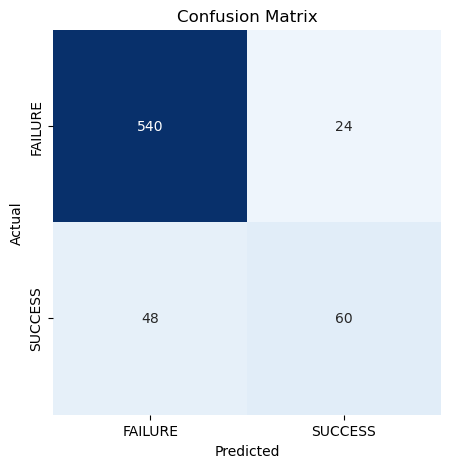

Classification Report:
------------------------------------
               precision    recall  f1-score   support

     FAILURE       0.92      0.96      0.94       564
     SUCCESS       0.71      0.56      0.62       108

    accuracy                           0.89       672
   macro avg       0.82      0.76      0.78       672
weighted avg       0.89      0.89      0.89       672



In [47]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=['FAILURE', 'SUCCESS'])

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks = np.arange(2)+0.5, labels=['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2)+0.5, labels=['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n------------------------------------\n", clr)